# E3 camera_sticker
* OpenCV를 이용하여 파이썬에서 이미지를 다루는 방법에 대해서 연습
* 원본 이미지의 얼굴을 영역을 인식하여 그 위에 스티커 사진을 올리는 코드 작성

## 00 package import
* cv2 는 OpenCV의 파이썬에서의 패키지명이며 이미지와 관련된 대부분의 작업이 가능하다. 
* dlib 패키지는 실생활에서의 사용할 수 있는 다양한 함수와 머신러닝과 관련된 패키지. python 버전에 따른 에러 문제가 있다. 

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib
import math
import imutils

## 01 raw image open and face reconigtion

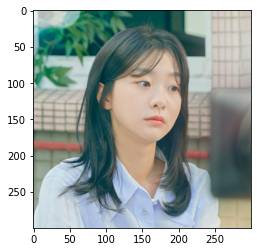

In [2]:
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/kim_dami.jpg'
img_bgr = cv2.imread(my_image_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_raw = img_rgb.copy()
plt.imshow(img_rgb)

1. 원하는 이미지의 경로를 변수에저장하기
    os.getenv로 "Home"의 경로를 받고 home하위의 파일의 경로를 문자열 합치기를 통해 이미지 경로로 설정
2. 이미지 열기<br/>
    cv2.imread(file_path) : file_path의 이미지 형태의 파일 열기
3. 이미지 컬러 바꾸기<br/>
    cv2.imread로 연 이미지 파일은 Blue Green Red의 순으로 채널을 인식하지만 jpg나 png와 같은 이미지 파일은 Red Green Blue 순으로 구성<br/>
    cv2.cvtColor(image, method) : image를 받아서 method로 색상을 바꾸거나 채널의 순서를 바꾸는 함수 여기서는 BGR2RGB 함수로 변경
4. 스티커를 붙이기 위한 raw 이미지 복사

rectangles[[(115, 68) (223, 175)]]


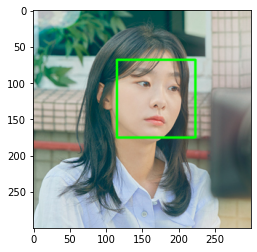

In [3]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_rgb, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    
plt.imshow(img_rgb)

* 얼굴영역 추출
1. 얼굴영역 추출<br/>
    dlib.get_frontal_face_detector() : 이미지 상의 얼굴을 찾는 함수 생성(객체형 함수)
    detector(image,1) : 함수에 이미지를 파라미터로 하여 함수 실행
2. 얼굴영역의 각 꼭지점 변수에 저장
3. 저장된 변수로 사각형 만들어서 이미지위에 표시<br/>
    cv2.rectangle(imge,a,b,(r,g,b),linewidth,linetype) : a, b는 사각형의 대각선에 있는 각 꼭지점 (왼쪽위 오른쪽아래)
    

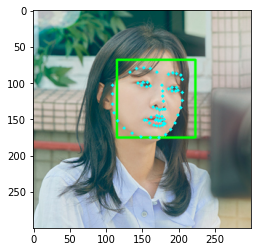

In [4]:
model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

points = landmark_predictor(img_rgb, dlib_rect)
list_points = list(map(lambda p: (p.x, p.y), points.parts()))
list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_rgb, point, 2, (0, 255, 255), -1)
        
# img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# plt.imshow(img_show_rgb)
plt.imshow(img_rgb)

* 얼굴 형태 추출
1. 얼굴을 점 형태로 표현한 파일 읽기<br/>
    shape_predictor(path): 경로의 파일을 읽어서 predictor 생성
    shape_predictor_68_face_landmark : 얼굴을 68개의 점들의 형태로 구성
    
2. 점 형태의 파일과 원본 이미지의 같은 점 찾기
    얼굴 영역에서 predictor의 형태와 같은 곳을 찾기
    
3. 원본 이미지에 찾은 점 표시

In [5]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[27])
    x = landmark[27][0]
    y = landmark[27][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x, y): (%d, %d)'%(x, y))
    print('(w, h): (%d, %d)'%(w, h))

(177, 103)
(x, y): (177, 103)
(w, h): (109, 109)


1. Dlib landmark의 포인트 중 왕관을 위한 위치고려 > 얼굴 정중앙에서 젤위
2. 얼굴 정중앙 점 27 사용
3. 27점과 얼굴영역을 사용하여 스티커 영역 정하기


(93, 93, 3)


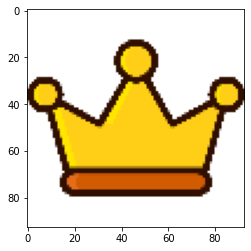

In [6]:
sticker_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/crown.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
img_sticker = cv2.resize(img_sticker, (int(w/1.168), int(h/1.168)))
print(img_sticker.shape)

plt.imshow(img_sticker)
plt.show()

* 원본 이미지에 붙일 이미지
1. 이미지 경로를 입력 받아서 이미지 열기
2. 이미지 사이즈를 원본 사진에 맞게 조절

In [7]:
first=True
for i in range(img_sticker.shape[0]):
    if ((img_sticker[i,:,:] !=[255,255,255]).any())&first:
        a= i
        first=False
    elif ((img_sticker[i,:,:] ==[255,255,255]).all())&~first:
        b = i
        first=True
img_sticker_cropped = img_sticker[a:b,:,:]

1. 각 행 중 모든 값이 255,255,255, 값으로 되어 있는 행 삭제<br/>
    for loop사용 각 행마다 255 255 255 값 추출

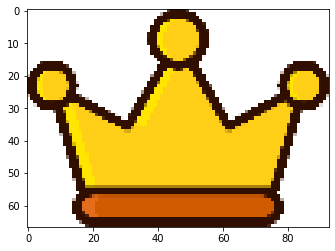

In [8]:
plt.imshow(img_sticker_cropped)

In [9]:
print(x,y,w)

177 103 109


In [10]:
refined_x = x - w // 2
refined_y = int(y - w // 2+(landmark[33][1]-landmark[8][1])*1.614) if int(y - w // 2+(landmark[33][1]-landmark[8][1])*1.614)>0 else 0
print('(x, y): (%d, %d)'%(refined_x, refined_y))

(x, y): (123, 0)


* 스티커 위치 미세 조정

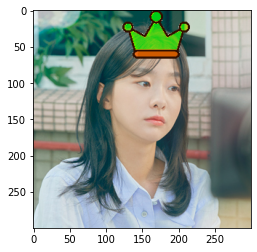

In [11]:
sticker_area = img_raw[refined_y:refined_y+img_sticker_cropped.shape[0], refined_x:refined_x+img_sticker_cropped.shape[1]]
img_raw[refined_y:refined_y+img_sticker_cropped.shape[0], refined_x:refined_x+img_sticker_cropped.shape[1]] = \
    np.where(img_sticker_cropped==255, sticker_area,img_sticker_cropped).astype(np.uint8)
#     np.where(img_sticker==0, img_sticker, sticker_area).astype(np.uint8)


#plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.imshow(img_raw)
plt.show()

* 원본 이미지 복사본에 스티커 붙이기<br/>
1. 스티커위치 미세 조정 영역을 새로 생성하여 저장<br/>
2. 원본 이미지에 스티커 올리기<br/>
    np.where을 사용하여 조건을 만족하면 sticker 아니면 저장된 원본이미지의 스티커 영역사용

In [12]:
def sticker_attach(image_path, sticker_path,face_landmark):
    img_bgr = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_raw = img_rgb.copy()
    detector_hog = dlib.get_frontal_face_detector()
    dlib_rects = detector_hog(img_rgb, 1)
    print(dlib_rects)
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

    cv2.rectangle(img_rgb, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    print('(l, t): (%d, %d)'%(l, t))
    print('(r, b): (%d, %d)'%(r, b))
    
    landmark_predictor = dlib.shape_predictor(face_landmark)
    list_landmarks = []
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

    for landmark in list_landmarks:
        for idx, point in enumerate(list_points):
            cv2.circle(img_rgb, point, 2, (0, 255, 255), -1)

    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        x = landmark[27][0]
        y = landmark[27][1]
        w = dlib_rect.width()
        h = dlib_rect.width()
    print('(x, y): (%d, %d)'%(x, y))
    print('(w, h): (%d, %d)'%(w, h))
    
    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
    img_sticker = cv2.resize(img_sticker, (int(w/1.168), int(h/1.168)))

    first=True
    for i in range(img_sticker.shape[0]):
        if ((img_sticker[i,:,:] !=[255,255,255]).any())&first:
            a= i
            first=False
        elif ((img_sticker[i,:,:] ==[255,255,255]).all())&~first:
            b = i
            first=True
    img_sticker_cropped = img_sticker[a:b,:,:]
    refined_x = x - w // 2
    refined_y = int(y - w // 2+(landmark[33][1]-landmark[8][1])*1.614) if int(y - w // 2+(landmark[33][1]-landmark[8][1])*1.614)>0 else 0
    sticker_area = img_raw[refined_y:refined_y+img_sticker_cropped.shape[0], refined_x:refined_x+img_sticker_cropped.shape[1]]
    img_raw[refined_y:refined_y+img_sticker_cropped.shape[0], refined_x:refined_x+img_sticker_cropped.shape[1]] = \
        np.where(img_sticker_cropped==255, sticker_area,img_sticker_cropped).astype(np.uint8)

    plt.imshow(img_raw)
    plt.show()

rectangles[[(126, 36) (215, 126)]]
(l, t): (126, 36)
(r, b): (215, 126)
(x, y): (174, 62)
(w, h): (90, 90)


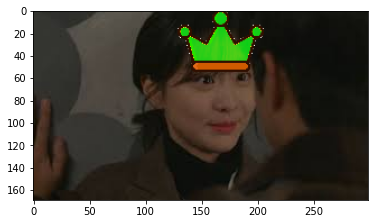

In [13]:
image_path= os.getenv("HOME") + '/aiffel/camera_sticker/images/kim_dami2.jpg'
sticker_attach(image_path,sticker_path,model_path)

* 어두운 사진에서의 성능 확인

rectangles[[(201, 98) (386, 284)]]
(l, t): (201, 98)
(r, b): (386, 284)
(x, y): (302, 161)
(w, h): (186, 186)


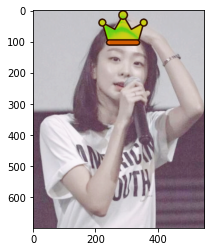

In [14]:
image_path= os.getenv("HOME") + '/aiffel/camera_sticker/images/kim_dami5.jpg'
sticker_attach(image_path,sticker_path,model_path)

* 먼 거리에서의 성능 확인

rectangles[[(181, 205) (233, 257)], [(425, 156) (487, 218)]]
(l, t): (425, 156)
(r, b): (487, 218)
(x, y): (453, 179)
(w, h): (53, 53)


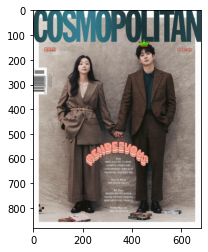

In [15]:
image_path= os.getenv("HOME") + '/aiffel/camera_sticker/images/kim_dami_choi.jpg'
sticker_attach(image_path,sticker_path,model_path)

* 두 사람일 때의 성능 확인

# 회고
* 얼굴각도에 따른 스티커의 회전을 위해서는 FaceMark의 기준점들이 얼마나 기울어져 있냐를 math 함수의 삼각함수들을 이용해서 적용 가능
* face mark가 제대로 작동하지 않는 경우는 큰 안경을 쓰고 있거나 화질이 떨어져 얼굴의 형태를 알아보기 힘든경우
* 여려명이 있는 경우에는 제일 위쪽에 있는 사람이 우선적으로 적용되는 것을 확인
* 얼굴의 맨위쪽에 스티커를 적용 시키려고 했으나 사진 끝에 걸리는 경우에는 사진끝에서 부터 적용됨을 확인
* dlib이 아니라 CNN 계열로 얼굴 Detect하는 방법도 추후 적용 가능